**PROBLEM 1**

1) Propose a conjugate normal prior for this problem. 

$\mu \sim N(40, \sigma_0^2 = 1.041)$, or alternatively $N(40, \tau_0 = 0.9604)$ if writing in terms of precision. 

We already know that the snowfall is centered around 40 inches per year. 
Variance is $(\frac{4}{2\cdot1.96})^2 = 1.041$


2) What would the posterior distribution be in such case? What can you comment about the posterior mean, an the relative contribution of prior and data to the posterior expectation?

$N(40.5868, \sigma^2 = 0.92558)$

The posterior mean is higher than the prior mean, which makes sense because the average of the snowfall data is 45.3. However, this isn't a huge change from 40, the prior has a higher relative contribution to the mean than the data does. 

In [2]:
library(MASS)

In [8]:
snowfall = c(38.6, 42.4, 57.5, 40.5, 51.7, 67.1, 33.4, 60.9, 64.1, 40.1, 40.7, 6.4)

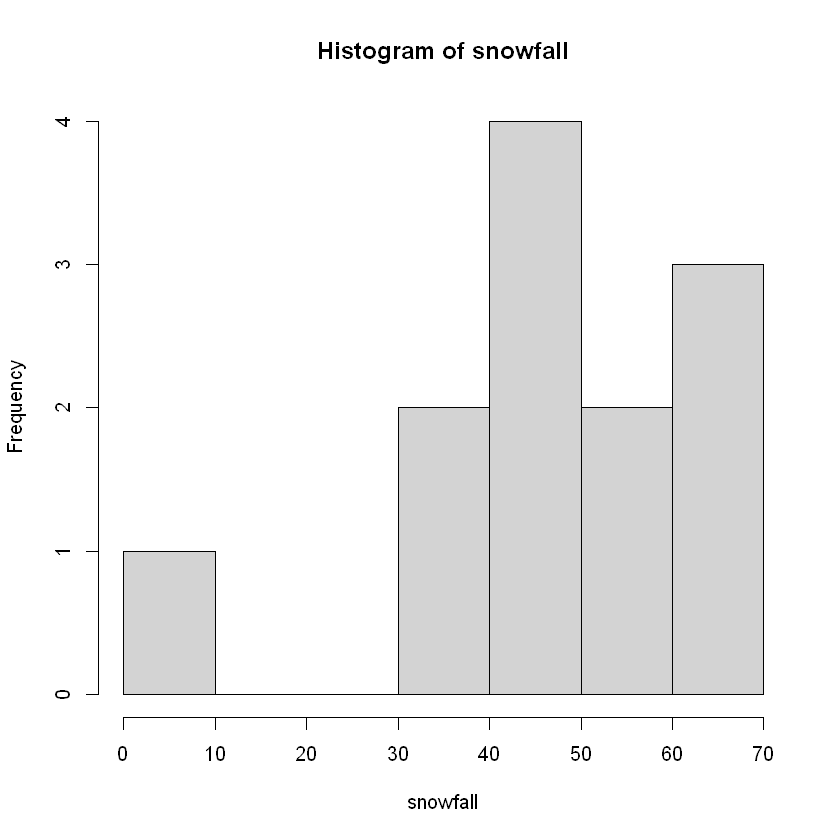

In [10]:
hist(snowfall)

In [7]:
n = length(snowfall);
sigma  =  10  # standard deviation 
m0 =  40   # posterior mean
s0 = 1.02041  #standard deviation
prior.precision = 1/s0^2; 
print(prior.precision)
post.precision = prior.precision + (n/sigma^2)
post.sd = sqrt(1/post.precision)
post.mean = (prior.precision/post.precision * m0) + ((n/sigma^2)/post.precision * mean(snowfall))
post.mean
(post.sd)^2
print(mean(snowfall))

[1] 0.9603965


[1] 40.58682

[1] 0.9255861

[1] 45.28333


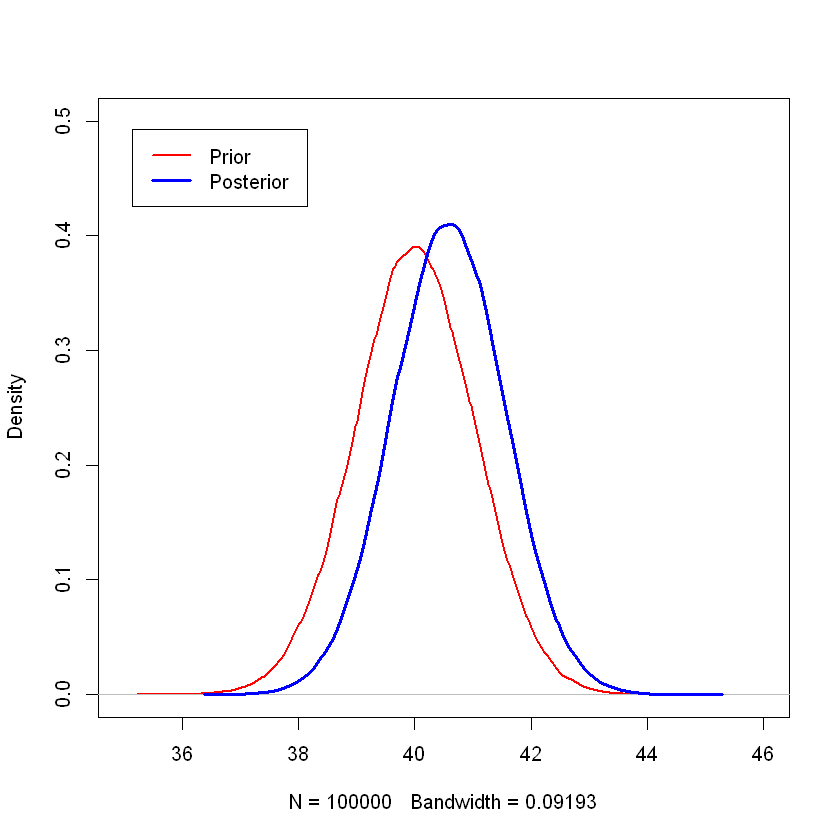

In [13]:
prior_samples = rnorm(100000, m0, s0)
posterior_samples = rnorm(100000, post.mean, post.sd)
plot(density(prior_samples), col="red", lwd=2, main="", xlim=c(35, 46), ylim=c(0,.5))
lines((density(posterior_samples)), col="blue", lwd=3)
 legend("topleft",c("Prior","Posterior"), lwd=c(2,3),col=c("red", "blue"),inset=0.05)

4) Compute the 10% and 90% quantiles of the posterior distribution. 

In [11]:
qnorm(c(0.1,0.90),post.mean,post.sd) 

[1] 39.35387 41.81977

5) For reporting needs, instead of computing the posterior mean of $\mu$ you are asked to compute the posterior mean of $g(\mu) = log(\mu)$. How do you do this?

I would use Monte Carlo integration. The reason is because we want to compute $E(g(\mu) | x) = \int g(\mu) p(\mu | x) d\mu$ but this will not be easy otherwise. 

**Problem 2**

1) Posterior of $\lambda$ for the Poisson/gamma model:

$Gamma(\sum y_i + a, n + b)$

In [15]:
patient_data = c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,10,10)
stem(patient_data, scale = 2)


  The decimal point is at the |

   0 | 000000000000000000000000000000
   1 | 000000000000
   2 | 000000
   3 | 
   4 | 
   5 | 
   6 | 
   7 | 
   8 | 
   9 | 
  10 | 00



2) Use the Poisson/Gamma model with a = b = .01 to study the rate of adverse events. Repeat with Gamma(.1, .1) and Gamma(1,1) and discuss the sensitivity. 

Overall, the results seem very insensitive to the choice of a and b for the prior. The posterior mean is still really close .88 for the parameter choices .01, .1, and 1. 

In [19]:
alpha = .01
beta = .01
sum = sum(patient_data)
n = 50
print(mean(patient_data))

[1] 0.88


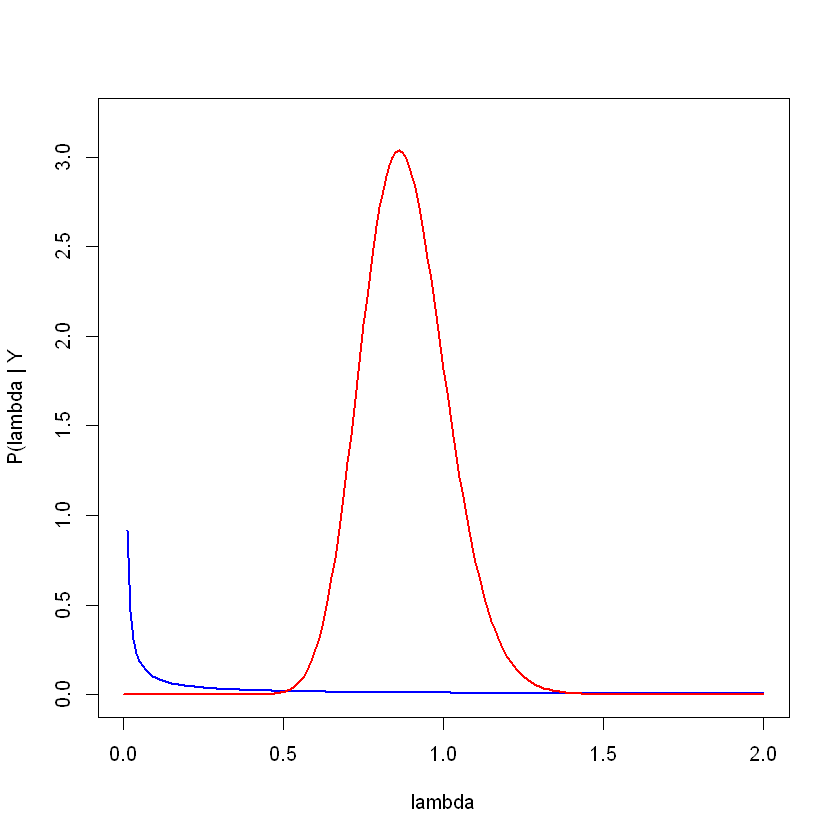

In [99]:
lambda = seq(0,2, by = 0.01) 
plot(lambda, dgamma(lambda, alpha, rate = beta), type = 'l', lwd = 2, col = 'blue',ylim = c(0, 3.2), xlab = 'lambda', 
     ylab = 'P(lambda | Y')
lines(lambda, dgamma(lambda, alpha + sum, rate = beta + n), type = 'l', lwd = 2, col = 'red')

In [9]:
#posterior mean
post_mean = (alpha + sum)/(beta + n)
print(post_mean)

[1] 0.880024


In [10]:
#95% credible interval 
qgamma(c(0.025, .975),  alpha + sum , beta + n)

[1] 0.6394519 1.1584123

[1] 0.8802395


[1] 0.6398339 1.1583935

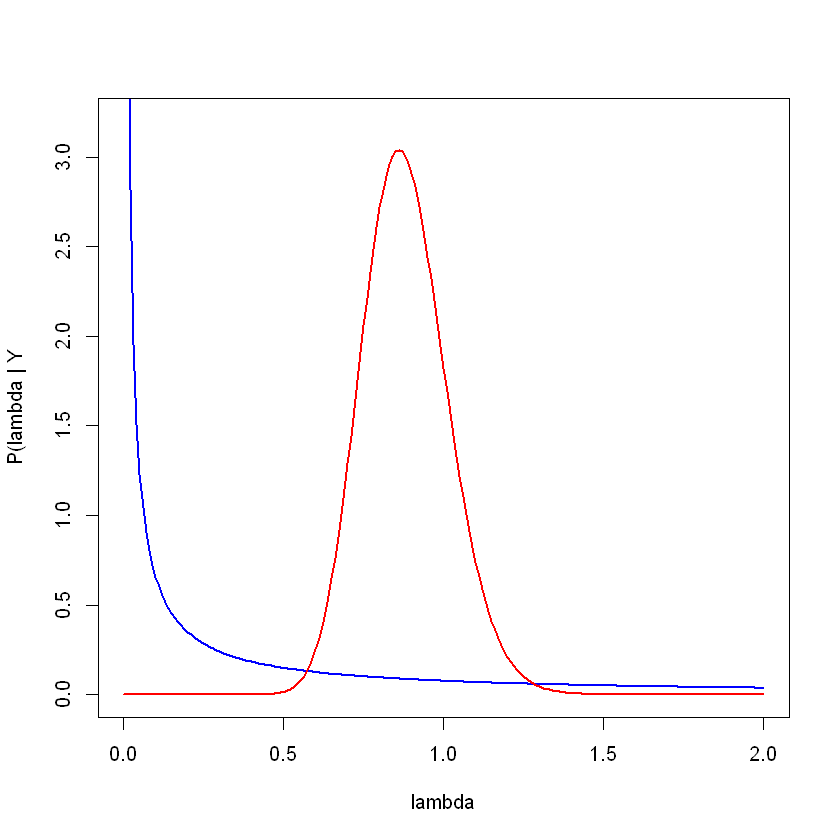

In [100]:
#repeat with Gamma(.1,.1) and Gamma(1,1)
alpha = .1
beta = .1
sum = sum(patient_data)
n = 50
post_mean = (alpha + sum)/(beta + n)
print(post_mean)
qgamma(c(0.025, .975),  alpha + sum , beta + n) 
lambda = seq(0,2, by = 0.01) 
plot(lambda, dgamma(lambda, alpha, rate = beta), type = 'l', lwd = 2, col = 'blue',ylim = c(0, 3.2), xlab = 'lambda', 
     ylab = 'P(lambda | Y')
lines(lambda, dgamma(lambda, alpha + sum, beta + n), type = 'l', lwd = 2, col = 'red')

[1] 0.88
[1] 0.8823529


[1] 0.6435943 1.1581950

[1] 45
[1] 51


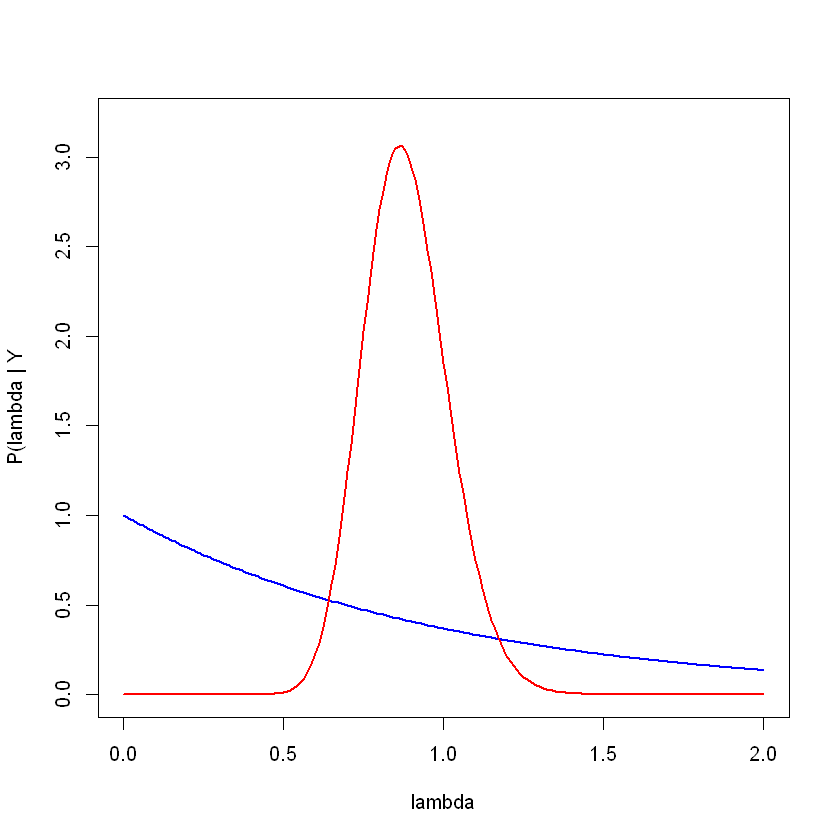

In [89]:
alpha = 1
beta = 1
sum = sum(patient_data)
n = 50
print(mean(patient_data))
lambda = seq(0,2, by = 0.01) 
plot(lambda, dgamma(lambda, alpha, beta), type = 'l', lwd = 2, col = 'blue',ylim = c(0, 3.2), xlab = 'lambda', 
     ylab = 'P(lambda | Y')
lines(lambda, dgamma(lambda, alpha + sum,  beta + n), type = 'l', lwd = 2, col = 'red')
post_mean = (alpha + sum)/(beta + n)
print(post_mean)
qgamma(c(0.025, .975),  alpha + sum , beta + n)
print(alpha + sum)
print(beta + n)

4) Plot the data versus the Poisson($\hat{\lambda}$), where $\hat{\lambda}$ is the posterior mean of $\lambda$ from part 2. Does the Poisson likelihood fit the data well?

[1] 0.880024


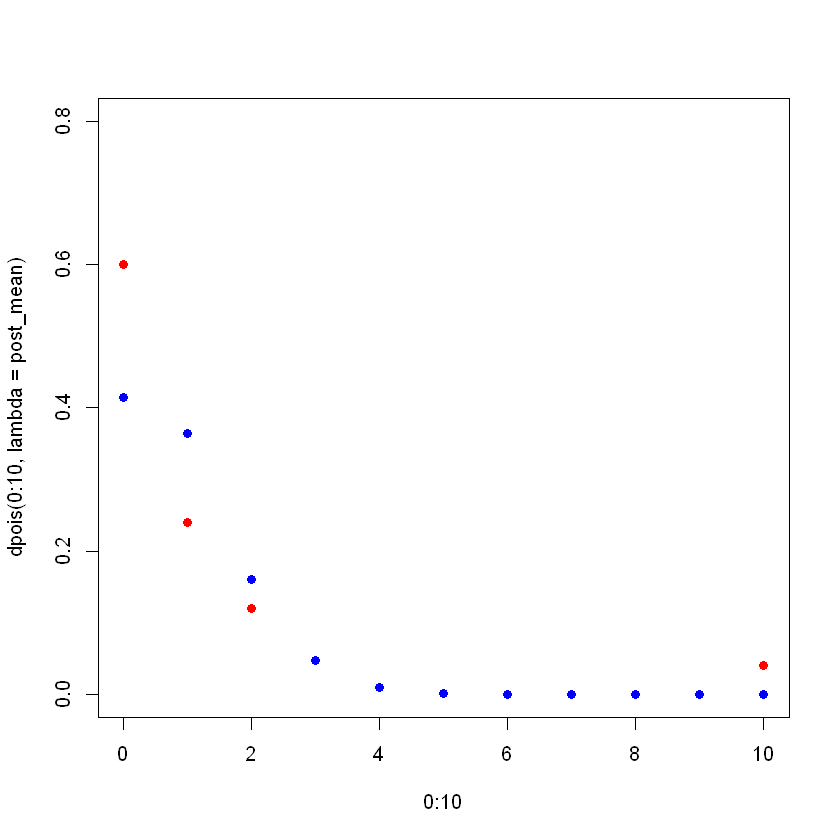

In [52]:
post_mean = (.01 + sum(patient_data))/(.01 + 50)
print(post_mean)
plot(0:10, dpois(0:10, lambda=post_mean), type='p', col = 'blue', ylim = c(0, .8), pch = 19)
x = c(0, 1, 2, 10)
y = c(30/50, 12/50, 6/50, 2/50)
points(x, y, col = 'red', pch = 19)

I don't think Poisson is nessecarily a great fit. For example, at x = 0, it's the difference between .6 and .4. Likewise, over at x = 10, in the actual data there is an upspike the is impossible to account for using a Poisson distribution. I think it might be considered a better fit if the minority of patients with 10 adverse effects are removed from the dataset but I'm not sure that it makes sense to do that. 

5) The current medication is thought to have around one adverse side effect per year. What is the posterior probability that this new medication has a higher side effect rate than the previous medication? Are the results sensitive to the prior?

No: the results are not sensitive to the prior. We should have around an 18 percent chance that the new medication is worse. 

In [101]:
alpha = 1
beta = 1
1 - pgamma(1 , shape = alpha + sum , rate = beta + n , lower.tail =TRUE )

alpha = .1
beta = .1
1 - pgamma(1 , shape = alpha + sum , rate = beta + n , lower.tail =TRUE )

alpha = .01
beta = .01
1 - pgamma(1 , shape = alpha + sum , rate = beta + n , lower.tail =TRUE )

[1] 0.1822844

[1] 0.1800479

[1] 0.1798218

**Problem 3**

Over last 50 years $\lambda_0$ = 75 wildfires per year. 
For next 10 years record number of fires and fit Poisson/Gamma model to the data. 

Prior: $\lambda$ ~ Gamma(a,b)
Select a and b so the prior is uninformative (i.e. has prior variance around 100, and $P(\lambda > \lambda_0) = .5$.)

In [75]:
A <- seq(0.1,100, by = 0.05) 
b = c()
for(a in A) {
    b = c(b, sqrt(a/100))
}

In [104]:
length = length(A)
for(i in 1:length){
    #print(i)
    #print(1 - pgamma(75,shape = A[i], rate = b[i], lower.tail = TRUE))
}

In [105]:
print(A[1138])
print(b[1138])

[1] 56.95
[1] 0.7546522


To the grader: I commented out the above lines purely because I don't want to extend the length of the my PDF submission by a ton. But what I did was just look for the index where the probability was closest to .5. Although something better probably could have done it was easy to just scan through the list by eye. This index was 1138, which corresponds to $\alpha = 56.95, \beta = .7547$. 

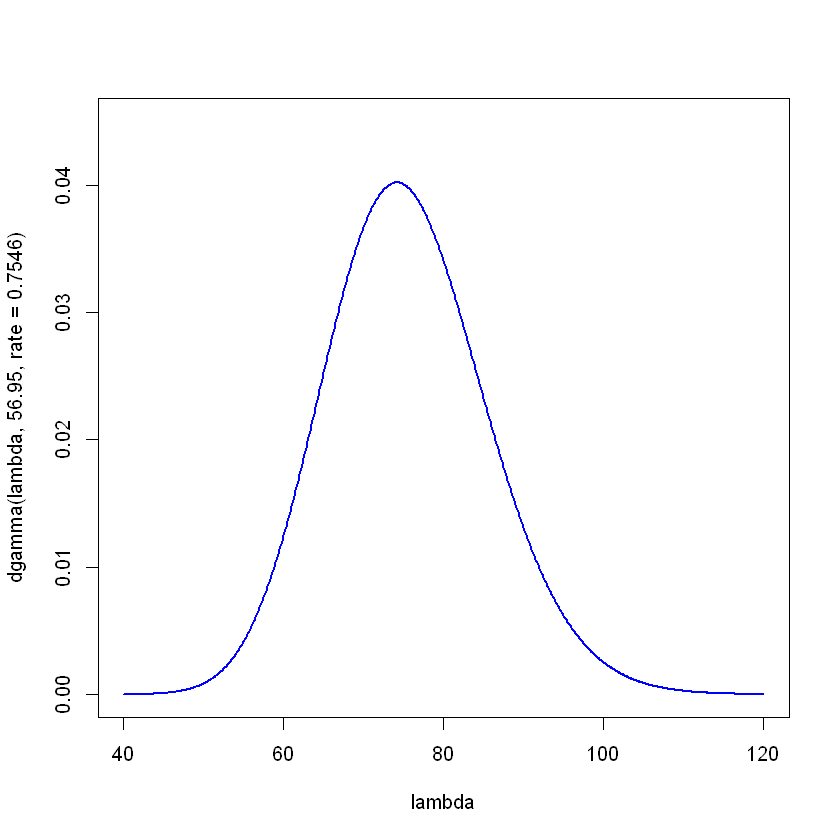

In [108]:
lambda = seq(40,120, by = 0.1)
plot(lambda, dgamma(lambda, 56.95,  rate = .7546), type = 'l', lwd = 2, col = 'blue',ylim = c(0, .045))